# K-Nearest Neighbour Model

## Importing libraries

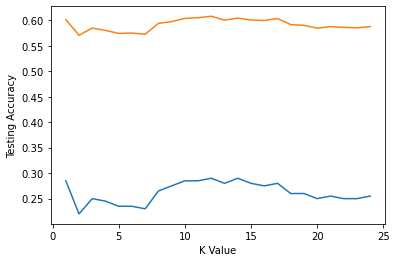

K value: 1 Testing Accuracy: 0.285
K value: 1 AUROC Accuracy: 0.6011846122877202
K value: 2 Testing Accuracy: 0.22
K value: 2 AUROC Accuracy: 0.5704370415181604
K value: 3 Testing Accuracy: 0.25
K value: 3 AUROC Accuracy: 0.5846456233915224
K value: 4 Testing Accuracy: 0.245
K value: 4 AUROC Accuracy: 0.5800552148072097
K value: 5 Testing Accuracy: 0.235
K value: 5 AUROC Accuracy: 0.5741305105643552
K value: 6 Testing Accuracy: 0.235
K value: 6 AUROC Accuracy: 0.574867668498139
K value: 7 Testing Accuracy: 0.23
K value: 7 AUROC Accuracy: 0.5725607612547866
K value: 8 Testing Accuracy: 0.265
K value: 8 AUROC Accuracy: 0.5939368501923591
K value: 9 Testing Accuracy: 0.275
K value: 9 AUROC Accuracy: 0.5972787108895147
K value: 10 Testing Accuracy: 0.285
K value: 10 AUROC Accuracy: 0.6035504364821682
K value: 11 Testing Accuracy: 0.285
K value: 11 AUROC Accuracy: 0.6049314821037892
K value: 12 Testing Accuracy: 0.29
K value: 12 AUROC Accuracy: 0.6078173031758748
K value: 13 Testing Accurac

In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pandas as pd
import matplotlib.pyplot as plt

#ADD MARKDOWN CELLS TO DESCRIBE THE FOLLOWING

#Taken from https://medium.com/@plog397/auc-roc-curve-scoring-function-for-multi-class-classification-9822871a6659
#By default, the sklearn implementation does not support multiclass input.
#The function below converts into a binary input.
def multiclass_auc_roc(y_test, y_pred):
    label = LabelBinarizer()
    label.fit(y_test)
    y_test = label.transform(y_test)
    y_pred = label.transform(y_pred)
    return metrics.roc_auc_score(y_test, y_pred)

music_df = pd.read_csv(r'D:\Uni\Y3\FYP\Code\Music Classification\extracted-features.csv')

#Read in CSV as a Pandas DataFrame
# print(music_df)
#Drop the TrackNum from the DataFrame (This is not important for classification)
music_df.drop('TrackNum', 1, inplace = True)
#Check the field has been dropped correctly
# print(music_df)

#   This will contain the data
data = music_df.iloc[:, 1:5].values
#   This will contain the labels corresponding to the data
labels = music_df.iloc[:, 0].values

data_train, data_test, labels_train, labels_test = train_test_split(data, labels, test_size = 0.2)

# print(x_train.shape)
# print(x_test.shape)
# print(y_train.shape)
# print(y_test.shape)

k_range = range(1, 25)
accuracy_scores_list = []
auroc_scores_list = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(data_train, labels_train)
    y_pred = knn.predict(data_test)

    accuracy_scores_list.append(metrics.accuracy_score(labels_test, y_pred))
    auroc_scores_list.append(multiclass_auc_roc(labels_test, y_pred))

plt.plot(k_range, accuracy_scores_list)
plt.plot(k_range, auroc_scores_list)
plt.xlabel("K Value")
plt.ylabel("Testing Accuracy")
plt.show()

for i in range(0, len(accuracy_scores_list)):
    print("K value: " + str(i + 1) + " Testing Accuracy: " + str(accuracy_scores_list[i]))
    print("K value: " + str(i + 1) + " AUROC Accuracy: " + str(auroc_scores_list[i]))